In [1]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python pillow
!pip install easyocr
import numpy as np
import pandas as pd
import re
import cv2
import os
import easyocr
import pytesseract
from PIL import Image

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.8 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,293 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,656 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [61.5 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,640 k

In [2]:
print(pytesseract.get_tesseract_version())

4.1.1


In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Dataset Shape (rows, columns):", df.shape)
print(df.info())
print(df.columns)

Dataset Shape (rows, columns): (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols]=df[cols].replace(0, pd.NA)

df=df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [7]:
image=cv2.imread("AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_7.png")

In [12]:
!unzip lbmaske.zip
!ls
!ls lbmaske

Archive:  lbmaske.zip
   creating: lbmaske/
  inflating: lbmaske/AHD-0425-PA-0007561_JITENDRA TRIVEDI DS_28-04-2025_1019-21_AM.pdf_page_9.png  
  inflating: lbmaske/AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_4.png  
  inflating: lbmaske/AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_7.png  
  inflating: lbmaske/AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_13.png  
  inflating: lbmaske/AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_27.png  
  inflating: lbmaske/BLR-0425-PA-0036693_ARVIND REDDY REPALA 0036693_28-04-2025_1120-45_AM@E.pdf_page_24.png  
  inflating: lbmaske/BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_20.png  
  inflating: lbmaske/BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_29.png  
  inflating: lbmaske/BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_31.png  
  inflating: lbmaske/BLR-0425-PA-0037318_SASHAN

In [13]:
!ls lbmaske

'AHD-0425-PA-0007561_JITENDRA TRIVEDI DS_28-04-2025_1019-21_AM.pdf_page_9.png'
 AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_4.png
 AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_7.png
 AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_13.png
 AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_27.png
'BLR-0425-PA-0036693_ARVIND REDDY REPALA 0036693_28-04-2025_1120-45_AM@E.pdf_page_24.png'
'BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_20.png'
'BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_29.png'
'BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_31.png'
'BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2_28-04-2025_1007-19_AM@E.pdf_page_33.png'
'BLR-0425-PA-0038965_BIPUL CHAKRABORTY 0038965 2 OF 2_28-04-2025_1014-26_AM.pdf_page_16.png'
'BLR-0425-PA-0038965_BIPUL CHAKRABORTY 0038965 2 OF 2_28-04-2025_1014-26_AM.pdf_page_7.png'
'BLR-0425-

In [14]:
image_folder = "/content/lbmaske"

image_files = os.listdir(image_folder)
print("Total images found:", len(image_files))

Total images found: 18


## Using Tesseract

In [16]:
extracted_texts = []

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)

    if img_path.endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        text = pytesseract.image_to_string(gray)

        extracted_texts.append({
            "image_name": img_name,
            "raw_text": text
        })

print("OCR completed for all images")

OCR completed for all images


In [17]:
for report in extracted_texts[:2]:
    print("Image:", report["image_name"])
    print(report["raw_text"])
    print("-" * 50)


Image: AHD-0425-PA-0008061_E-mahendrasinghdischargecard_250427_1114@E.pdf_page_13.png
Test Report
K.P. Patil Building,
Near Shivaji Maharaj Statue,
Mohopada, Tal. Khalapur,
Dist. Raigad - 410 222.

Mob ; 93726 96384

\ SHREE DIAGNOSTIC

     
 
      
   
  

Pation 1
= : is

Gender :Male Report Print Time — ; 27-Apr-2025 10:18 AM
Hy Doctor; Dr Ram ql P . " :

Clon 5 - ; nD a

Complete Blood Ci
MB 1.000 count (cnc)

Hemogtobin

   

 

   
 

Unit

11.6 yin/dl 13.0-17.0

2acked Ce y % —

6 Packed Cell Volume (HCT) 45.2 % 40-50

-B.C.C elec
> : Count 5.10 mill/emm 4.5-5.5
Mean Cell Volume(MCV) 88.6 fl 83-101
Mean Cell Hemoglobin( MCH) 22:7. pe 27-33
Mean Cell Hb Conc(MCHC) 25.7 % 32-38
Total WBC “Count 9200 cells/cumm 4000-11000
Differential % WBCs count
Neutrophils 66 % 50-70
Lymphocytes 24° % 20-40
t Eosinophils 4 % 1-6

FCM/ “icroscopy
Monocytes 06 % 0-10
FCM/ Microscopy
Absolute Differential Count :
Absolute Neutrophils Count 6072 /cumm 2000-7000
Absolute Lymphocytes Count 2208 /cum

In [18]:
structured_records = []

for report in extracted_texts:
    text = report["raw_text"]

    glucose = re.findall(r'Glucose[:\s]+(\d+)', text)
    bp = re.findall(r'BP[:\s]+(\d+)', text)

    structured_records.append({
        "image_name": report["image_name"],
        "Glucose": glucose[0] if glucose else None,
        "BloodPressure": bp[0] if bp else None
    })

structured_df = pd.DataFrame(structured_records)
structured_df


,image_name,Glucose,BloodPressure
0,AHD-0425-PA-0008061_E-mahendrasinghdischargeca...,None,None
1,AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pd...,None,None
2,BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2...,None,None
3,AHD-0425-PA-0007561_JITENDRA TRIVEDI DS_28-04-...,None,None
4,BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2...,None,None
5,BLR-0425-PA-0039192_E-PareshwarFinalBill_25042...,None,None
6,BLR-0425-PA-0037318_SASHANK P K 0037318 2 OF 2...,None,None
7,BLR-0425-PA-0038965_BIPUL CHAKRABORTY 0038965 ...,None,None
8,BLR-0425-PA-0036693_ARVIND REDDY REPALA 003669...,None,None
9,AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pd...,None,None


In [19]:
print(extracted_texts[0]["raw_text"])

Test Report
K.P. Patil Building,
Near Shivaji Maharaj Statue,
Mohopada, Tal. Khalapur,
Dist. Raigad - 410 222.

Mob ; 93726 96384

\ SHREE DIAGNOSTIC

     
 
      
   
  

Pation 1
= : is

Gender :Male Report Print Time — ; 27-Apr-2025 10:18 AM
Hy Doctor; Dr Ram ql P . " :

Clon 5 - ; nD a

Complete Blood Ci
MB 1.000 count (cnc)

Hemogtobin

   

 

   
 

Unit

11.6 yin/dl 13.0-17.0

2acked Ce y % —

6 Packed Cell Volume (HCT) 45.2 % 40-50

-B.C.C elec
> : Count 5.10 mill/emm 4.5-5.5
Mean Cell Volume(MCV) 88.6 fl 83-101
Mean Cell Hemoglobin( MCH) 22:7. pe 27-33
Mean Cell Hb Conc(MCHC) 25.7 % 32-38
Total WBC “Count 9200 cells/cumm 4000-11000
Differential % WBCs count
Neutrophils 66 % 50-70
Lymphocytes 24° % 20-40
t Eosinophils 4 % 1-6

FCM/ “icroscopy
Monocytes 06 % 0-10
FCM/ Microscopy
Absolute Differential Count :
Absolute Neutrophils Count 6072 /cumm 2000-7000
Absolute Lymphocytes Count 2208 /cumm 1000-3000
Absolute Monocytes Count 552 /cumm 200-1000
Absolute Eosinophils Count, AE

## Using easyocr

In [20]:
reader=easyocr.Reader(['en'])
results=reader.readtext(image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [21]:
print("Extracted Text:\n")
for bbox, text, confidence in results:
    print(f"{text} (Confidence: {confidence:.2f})")

Extracted Text:

Atul S. Vadhavkar (Confidence: 0.72)
B.Sc (Micro) DMLT (Confidence: 0.73)
SHRGE (Confidence: 0.52)
FULLY (Confidence: 1.00)
diAgnostIC (Confidence: 0.20)
COMPUTERISED (Confidence: 1.00)
PATHOLOGICAL (Confidence: 1.00)
024 (Confidence: 1.00)
CGnTRE (Confidence: 0.71)
LABORATORY (Confidence: 0.69)
SHREE HOSPITAL, Gan (Confidence: 0.68)
Tme : BOan t 800pm (Confidence: 0.32)
sundy- 8,00 t 120nn (Confidence: 0.55)
Murbad Road; Kalyan (W): (Confidence: 0.75)
Dr_ (Confidence: 0.71)
Dr. BHAVESH CHAUHAN MD (Confidence: 0.82)
Shree Hospital IPD (Confidence: 1.00)
Time (Confidence: 0.99)
12*47.26 (Confidence: 0.66)
Sample Id (Confidence: 0.99)
10436879 (Confidence: 0.98)
Report Release Time (Confidence: 0.80)
13.42:13 (Confidence: 0.49)
COMPLETE BLOOD COUNT (Confidence: 0.96)
Test (Confidence: 1.00)
Result (Confidence: 1.00)
Unit (Confidence: 1.00)
Biological Ref. Range (Confidence: 0.90)
Haemoglobin (Confidence: 1.00)
9.10 [L] (Confidence: 0.93)
13.0-17.0 (Confidence: 1.00)
Tota

In [22]:
ocr_text=" ".join([text for _,text,_ in results])
ocr_text

'Atul S. Vadhavkar B.Sc (Micro) DMLT SHRGE FULLY diAgnostIC COMPUTERISED PATHOLOGICAL 024 CGnTRE LABORATORY SHREE HOSPITAL, Gan Tme : BOan t 800pm sundy- 8,00 t 120nn Murbad Road; Kalyan (W): Dr_ Dr. BHAVESH CHAUHAN MD Shree Hospital IPD Time 12*47.26 Sample Id 10436879 Report Release Time 13.42:13 COMPLETE BLOOD COUNT Test Result Unit Biological Ref. Range Haemoglobin 9.10 [L] 13.0-17.0 Total R.B.C. Count 3.19 [L] millcmm 4.5-5.5 milllcmm Haematocrit (PCVIHCT) 27,20 [L] % 40.0-50.0 % Mean Corpuscular Volume (MC.V:) 85.30 fl 83.0-95.0 fl Mean Corpuscular Hb (MC.H) 28.50 Pg 27.0-32.0 Pg Mean Corpuscular Hb Conc (MC.H.C) 33.50 31.5-34.5 {#} Red cell Distribution Width (R.DW: 16.5 [H] % 11.6-14.6 % CV) Total W.B.C. Count 10560 [H] Iul 4000-10000 /ul DHFFERENTIAL CQUNI: Neutrophils 87.7 [H] % 40-70 % Lymphocytes 5.9 [L] % 20-40 % Eosinophils 0.7 [L] % 1-6 % 5.5 % 2-10 % Monocytes 0.2 % 0-1 % Basophils PLATELETS Platelet Count 370 luL 150-450 /uL 9.4 fL 6.78-13.46 IL {#}MPV IMMATURE PLATELE

In [23]:
import re

data = {}

# Extract Hemoglobin
hb_match = re.search(r'Haemoglobin\s*(\d+\.\d+)', ocr_text, re.I)
data['Hemoglobin'] = float(hb_match.group(1)) if hb_match else None

# Extract RBC Count
rbc_match = re.search(r'Total R\.B\.C\. Count\s*(\d+\.\d+)', ocr_text, re.I)
data['RBC Count'] = float(rbc_match.group(1)) if rbc_match else None

# Extract WBC Count
wbc_match = re.search(r'Total W\.B\.C\. Count\s*(\d+)', ocr_text, re.I)
data['WBC Count'] = int(wbc_match.group(1)) if wbc_match else None

# Extract Platelet Count
platelets_match = re.search(r'Platelet Count\s*(\d+)', ocr_text, re.I)
data['Platelet Count'] = int(platelets_match.group(1)) if platelets_match else None

print(data)

{'Hemoglobin': 9.1, 'RBC Count': 3.19, 'WBC Count': 10560, 'Platelet Count': 370}


In [24]:
structured_df=pd.DataFrame([data])
structured_df

,Hemoglobin,RBC Count,WBC Count,Platelet Count
0,9.1,3.19,10560,370


In [25]:
structured_df.to_csv('structured_data.csv', index=False)

In [26]:
df.to_csv('cleaned_diabetes_data.csv', index=False)

In [27]:
from google.colab import files
files.download('cleaned_diabetes_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ML algorithms

In [29]:
## Random forest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv("/content/cleaned_diabetes_data.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# Training accuracy and Testing accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 0.8945686900958466
Testing Accuracy : 0.810126582278481


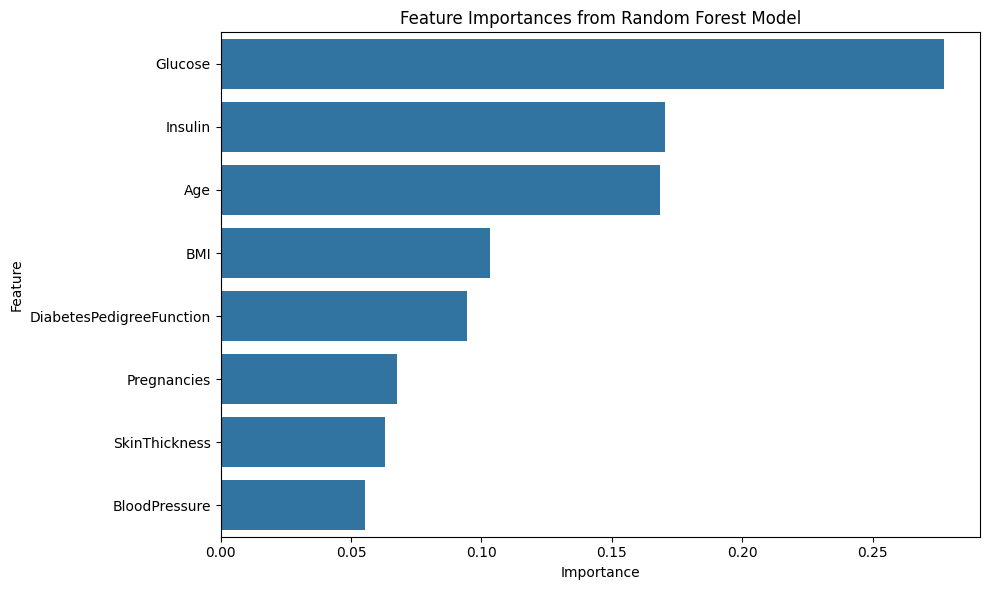

In [32]:
# Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Access feature importances from the Random Forest model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [33]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(
    solver="liblinear",
    class_weight="balanced",
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Training & Testing accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 0.7731629392971247
Testing Accuracy : 0.7215189873417721


In [34]:
## SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Pipeline: Scaling + SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(class_weight="balanced", random_state=42))
])

# Hyperparameter grid
param_grid = {
    "svm__C": [0.1, 1, 10, 50],
    "svm__gamma": [0.01, 0.1, 1],
    "svm__kernel": ["rbf"]
}

# Grid Search
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)
model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

# Training & Testing accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)

Best Parameters: {'svm__C': 50, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Training Accuracy: 0.8242811501597445
Testing Accuracy : 0.7974683544303798


In [35]:
## Gradient Boosting
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.02,
    max_depth=4,
    num_leaves=15,
    min_child_samples=50,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=1.0,
    reg_lambda=1.0,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


[LightGBM] [Info] Number of positive: 104, number of negative: 209
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 313, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Threshold

In [36]:
THRESHOLDS = {
    "Glucose": 140,
    "BloodPressure": 130,
    "BMI": 30,
    "Insulin": 200
}

def check_status(value, limit, high_label, normal_label="Normal"):
    return high_label if value >= limit else normal_label

df["Glucose_Status"] = df["Glucose"].apply(
    lambda x: check_status(x, THRESHOLDS["Glucose"], "Diabetes (High)")
)

df["BP_Status"] = df["BloodPressure"].apply(
    lambda x: check_status(x, THRESHOLDS["BloodPressure"], "High BP")
)

df["BMI_Status"] = df["BMI"].apply(
    lambda x: check_status(x, THRESHOLDS["BMI"], "Obese")
)

df["Insulin_Status"] = df["Insulin"].apply(
    lambda x: check_status(x, THRESHOLDS["Insulin"], "High Insulin")
)

df["Pregnancy_Status"] = df["Pregnancies"].apply(
    lambda x: "High Risk" if x > 5 else "Moderate Risk" if x >= 3 else "Low Risk"
)
df[
    [
        "Glucose", "Glucose_Status",
        "BloodPressure", "BP_Status",
        "BMI", "BMI_Status",
        "Insulin", "Insulin_Status",
        "Pregnancies", "Pregnancy_Status"
    ]
].head()


,Glucose,Glucose_Status,BloodPressure,BP_Status,BMI,BMI_Status,Insulin,Insulin_Status,Pregnancies,Pregnancy_Status
3,89,Normal,66,Normal,28.1,Normal,94,Normal,1,Low Risk
4,137,Normal,40,Normal,43.1,Obese,168,Normal,0,Low Risk
6,78,Normal,50,Normal,31.0,Obese,88,Normal,3,Moderate Risk
8,197,Diabetes (High),70,Normal,30.5,Obese,543,High Insulin,2,Low Risk
13,189,Diabetes (High),60,Normal,30.1,Obese,846,High Insulin,1,Low Risk


## Alerts based on thresholds

In [37]:
def generate_alert(value, threshold):
    return "ALERT" if value >= threshold else "OK"
df["Glucose_Alert"] = df["Glucose"].apply(
    lambda x: generate_alert(x, THRESHOLDS["Glucose"])
)

df["BP_Alert"] = df["BloodPressure"].apply(
    lambda x: generate_alert(x, THRESHOLDS["BloodPressure"])
)

df["BMI_Alert"] = df["BMI"].apply(
    lambda x: generate_alert(x, THRESHOLDS["BMI"])
)

df["Insulin_Alert"] = df["Insulin"].apply(
    lambda x: generate_alert(x, THRESHOLDS["Insulin"])
)
df[
    [
        "Glucose", "Glucose_Status", "Glucose_Alert",
        "BloodPressure", "BP_Status", "BP_Alert",
        "BMI", "BMI_Status", "BMI_Alert",
        "Insulin", "Insulin_Status", "Insulin_Alert"
    ]
].head()



,Glucose,Glucose_Status,Glucose_Alert,BloodPressure,BP_Status,BP_Alert,BMI,BMI_Status,BMI_Alert,Insulin,Insulin_Status,Insulin_Alert
3,89,Normal,OK,66,Normal,OK,28.1,Normal,OK,94,Normal,OK
4,137,Normal,OK,40,Normal,OK,43.1,Obese,ALERT,168,Normal,OK
6,78,Normal,OK,50,Normal,OK,31.0,Obese,ALERT,88,Normal,OK
8,197,Diabetes (High),ALERT,70,Normal,OK,30.5,Obese,ALERT,543,High Insulin,ALERT
13,189,Diabetes (High),ALERT,60,Normal,OK,30.1,Obese,ALERT,846,High Insulin,ALERT
